# Group Analysis

# Setup

In [1]:
# import library
from scipy.io import loadmat
import numpy as np
import seaborn as sns
import pandas as pd
import pingouin as pg
from matplotlib import pyplot as plt

from warpped.collection import parse_chronnectome, get_mean_chronnectome, get_number_of_visit
# import gloabl variables
from warpped.global_variables import * 
from warpped.figures import fig_set

# Load HMM Result

In [2]:
# The selected model should be contained in global_variables, if wanna try different parameter then uncomment bleow 
# K_state=12; rep_num = 2

hmm_file = base+f'chronotype_k{K_state}_rep_{rep_num}.mat'
hmminfo_file = base+f'hmminfo/hmminfo_k{K_state}_rep_{rep_num}.mat'
hmminfo_file

'/home/jzni/dissertation/analysis/output/hmminfo/hmminfo_k7_rep_3.mat'

In [3]:
hmm = loadmat(hmm_file)
hmm_info = loadmat(hmminfo_file)

In [4]:
# Parse HMM info
state_order = np.squeeze(hmm_info['ord']) # the order of state for fo_corr and ordered_p
fo_corr = pd.DataFrame(hmm_info['fo_matrix'], columns=state_order, index=state_order)
ordered_p = pd.DataFrame(hmm_info['ordered_p'], columns=state_order, index=state_order)

## hmms = hmm_info['hmms']  # contains the subject specific hmm
# Parse chronnectome info
## info based on veterbi path 
raw_fo, lifetime, intervals = parse_chronnectome(hmm_info[hmminfo_source], model_selection=False)


## Load Behaviour Data

In [5]:
performance = pd.read_csv(f'{behav_dir}performance_proc.csv')
physio = pd.read_csv(f'{behav_dir}physio_proc.csv')
acti = pd.read_csv(f'{behav_dir}actigraph_proc.csv')
scales = pd.read_csv(f'{behav_dir}questionnaire_proc.csv')


In [6]:
fo_df =  pd.DataFrame(raw_fo, columns=[f'state{i}_fo' for i in range(1, K_state+1)])
lifetime_df = pd.DataFrame(get_mean_chronnectome(lifetime ), columns=[f'state{i}_life' for i in range(1, K_state+1)])
interval_df = pd.DataFrame(get_mean_chronnectome(intervals), columns=[f'state{i}_intervals' for i in range(1, K_state+1)])
visits_df = get_number_of_visit(lifetime)
visits_df.head()

,state1_visits,state2_visits,state3_visits,state4_visits,state5_visits,state6_visits,state7_visits
0,10,11,10,15,17,7,15
1,12,14,11,14,11,12,11
2,24,17,16,7,7,7,13
3,18,14,11,10,10,6,11
4,18,5,13,15,11,8,13


In [7]:
chronnectome_df = pd.concat([fo_df,lifetime_df, interval_df, visits_df], axis=1).applymap(lambda x: round(float(x),2))
chronnectome_df

,state1_fo,state2_fo,state3_fo,state4_fo,state5_fo,state6_fo,state7_fo,state1_life,state2_life,state3_life,...,state5_intervals,state6_intervals,state7_intervals,state1_visits,state2_visits,state3_visits,state4_visits,state5_visits,state6_visits,state7_visits
0,0.12,0.11,0.12,0.22,0.17,0.08,0.19,5.20,4.36,5.30,...,19.12,28.33,24.64,10.0,11.0,10.0,15.0,17.0,7.0,15.0
1,0.15,0.15,0.12,0.18,0.13,0.15,0.13,5.50,4.93,4.82,...,35.30,29.55,38.70,12.0,14.0,11.0,14.0,11.0,12.0,11.0
2,0.27,0.21,0.21,0.06,0.06,0.06,0.13,5.12,5.47,5.88,...,53.33,57.67,29.17,24.0,17.0,16.0,7.0,7.0,7.0,13.0
3,0.16,0.17,0.14,0.11,0.18,0.08,0.16,4.00,5.36,5.73,...,37.00,68.20,33.90,18.0,14.0,11.0,10.0,10.0,6.0,11.0
4,0.19,0.05,0.21,0.21,0.13,0.10,0.11,4.78,4.20,7.23,...,32.80,51.14,29.83,18.0,5.0,13.0,15.0,11.0,8.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.26,0.19,0.18,0.13,0.02,0.09,0.12,5.52,6.69,6.31,...,32.00,37.60,30.00,21.0,13.0,13.0,11.0,2.0,11.0,13.0
107,0.21,0.11,0.24,0.14,0.04,0.04,0.22,5.17,5.00,6.11,...,77.33,39.00,20.80,18.0,10.0,18.0,9.0,4.0,4.0,16.0
108,0.16,0.09,0.15,0.20,0.19,0.10,0.12,5.00,4.44,3.78,...,22.33,42.25,53.33,14.0,9.0,18.0,12.0,16.0,9.0,7.0
109,0.22,0.09,0.14,0.17,0.10,0.13,0.15,6.12,4.88,4.92,...,56.00,39.11,30.36,16.0,8.0,13.0,13.0,8.0,10.0,12.0


<AxesSubplot:>

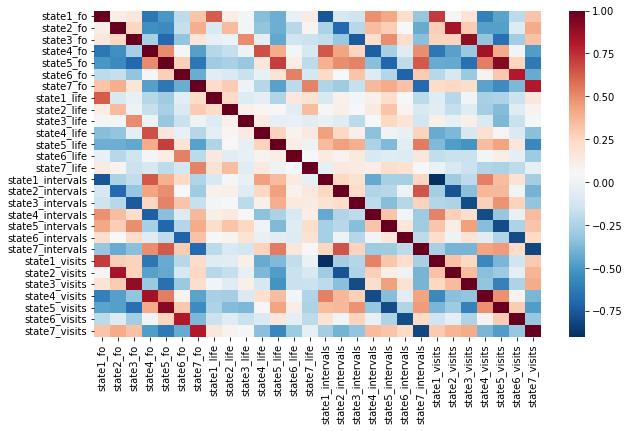

In [8]:
# FO matrix
plt.figure(figsize=(10,6))
sns.heatmap(chronnectome_df.corr(),cmap='RdBu_r')

## Label Encoding


In [9]:
# Chronotype Encoding
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(performance[['Type']])
chrono_array = oe_results.toarray()[:,0]
chrono_array

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
# Session Encoding 
ses_array = np.repeat([0,1,2],37)
ses_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

# Group Analysis

In [11]:
fo = fo_df.copy()
fo['chrono']=chrono_array; fo['time']=ses_array


In [12]:
fo

,state1_fo,state2_fo,state3_fo,state4_fo,state5_fo,state6_fo,state7_fo,chrono,time
0,0.115556,0.106667,0.117778,0.220000,0.171111,0.075556,0.193333,1.0,0
1,0.146667,0.153333,0.117778,0.177778,0.126667,0.151111,0.126667,1.0,0
2,0.273333,0.206667,0.208889,0.062222,0.060000,0.062222,0.126667,1.0,0
3,0.160000,0.166667,0.140000,0.111111,0.182222,0.080000,0.160000,1.0,0
4,0.191111,0.046667,0.208889,0.206667,0.133333,0.102222,0.111111,1.0,0
...,...,...,...,...,...,...,...,...,...
106,0.257778,0.193333,0.182222,0.133333,0.024444,0.088889,0.120000,0.0,2
107,0.206667,0.111111,0.244444,0.140000,0.037778,0.042222,0.217778,0.0,2
108,0.155556,0.088889,0.151111,0.195556,0.188889,0.097778,0.122222,0.0,2
109,0.217778,0.086667,0.142222,0.171111,0.104444,0.126667,0.151111,0.0,2


# Group analysis  


In [13]:
import scipy
from scipy import stats 

random_state = 42

In [14]:
#@title Warp the mean comparison function
def norm_test(group_list, alpha=0.05):
    total_norm=True
    for group in group_list:
        total_norm = total_norm & (stats.shapiro(group)[1]>=0.05)
        if total_norm == False:
            return total_norm
    return total_norm

def compare_mean(df1,df2, K_state):
    mean = []
    for state_index in range(K_state):
        g1=df1.iloc[:, state_index]; g2 = df2.iloc[:, state_index]
        norm = norm_test([g1,g2])
        equal_var = True if stats.levene(g1,g2)[1]>0.05 else False
        if norm:
            mean_comp = stats.ttest_ind(g1, g2, equal_var=equal_var)
        else: 
            mean_comp = stats.mannwhitneyu(g1, g2)
        mean.append([norm, equal_var, mean_comp[0], mean_comp[1]])
    return pd.DataFrame(mean,index=[f"State {i+1}" for i in range(K_state)],
             columns=['normality', 'equal variance', 'stat', 'p value'])


## Two-way Anova

In [15]:
fo

,state1_fo,state2_fo,state3_fo,state4_fo,state5_fo,state6_fo,state7_fo,chrono,time
0,0.115556,0.106667,0.117778,0.220000,0.171111,0.075556,0.193333,1.0,0
1,0.146667,0.153333,0.117778,0.177778,0.126667,0.151111,0.126667,1.0,0
2,0.273333,0.206667,0.208889,0.062222,0.060000,0.062222,0.126667,1.0,0
3,0.160000,0.166667,0.140000,0.111111,0.182222,0.080000,0.160000,1.0,0
4,0.191111,0.046667,0.208889,0.206667,0.133333,0.102222,0.111111,1.0,0
...,...,...,...,...,...,...,...,...,...
106,0.257778,0.193333,0.182222,0.133333,0.024444,0.088889,0.120000,0.0,2
107,0.206667,0.111111,0.244444,0.140000,0.037778,0.042222,0.217778,0.0,2
108,0.155556,0.088889,0.151111,0.195556,0.188889,0.097778,0.122222,0.0,2
109,0.217778,0.086667,0.142222,0.171111,0.104444,0.126667,0.151111,0.0,2


In [16]:
#@title warp twoway_anova
# Ordinary Least Squares (OLS) model
import statsmodels.api as sm
from statsmodels.formula.api import ols
def twoway_anova(fo, K_state, n_rep=1000):
    anova_tables = [] ; Fvalue_table=pd.DataFrame()
    state_list = [ f'state{i}' for i in range(1, K_state+1)]
    for state in state_list:
        model = ols(f"{state}_fo ~ C(chrono)+ C(time)+ C(chrono)*C(time)", data=fo).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        anova_tables.append(anova_table)
        Fvalue_table[f"{state}_F"] = anova_table.loc[:,'F']
        Fvalue_table[f"{state}_p"] = anova_table.loc[:,'PR(>F)']
    
    return Fvalue_table, anova_tables 

In [17]:
#@title Warp boxplot function
def twoway_boxplot(fo, K_state, subplotformat='33',figsize1=(15,8), title=""):
    subplot_num= K_state
    state_list = [ f'state{i}' for i in range(1, K_state+1)]
    plt.figure(figsize=figsize1)  
    for i in range(len(state_list)):
        state = state_list[i]
        ax = plt.subplot(int(f'{subplotformat}{i+1}'))
        plt.tight_layout()
        sns.boxplot(x="time", y=f"{state}_fo", hue="chrono", data=fo, palette="Set3") 

In [18]:
# Ordinary Least Squares (OLS) model
# model = ols(f"{state} ~ C(chronotype)+ C(time)+ C(chronotype)*C(time)", data=fo).fit()

Fvalue_table, anova_tables = twoway_anova(fo,K_state)
Fvalue_table

,state1_F,state1_p,state2_F,state2_p,state3_F,state3_p,state4_F,state4_p,state5_F,state5_p,state6_F,state6_p,state7_F,state7_p
C(chrono),0.048369,0.826354,2.407008,0.123802,2.094483,0.150811,0.291856,0.590177,0.037657,0.846508,0.133354,0.715714,1.175503,0.280757
C(time),0.412173,0.663276,0.018564,0.981610,1.382905,0.255379,0.285734,0.752045,0.861182,0.425625,0.931673,0.397126,1.504320,0.226917
C(chrono):C(time),0.428952,0.652327,1.507446,0.226229,0.070139,0.932308,0.952422,0.389113,1.025071,0.362333,0.207947,0.812584,0.877543,0.418830
Residual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


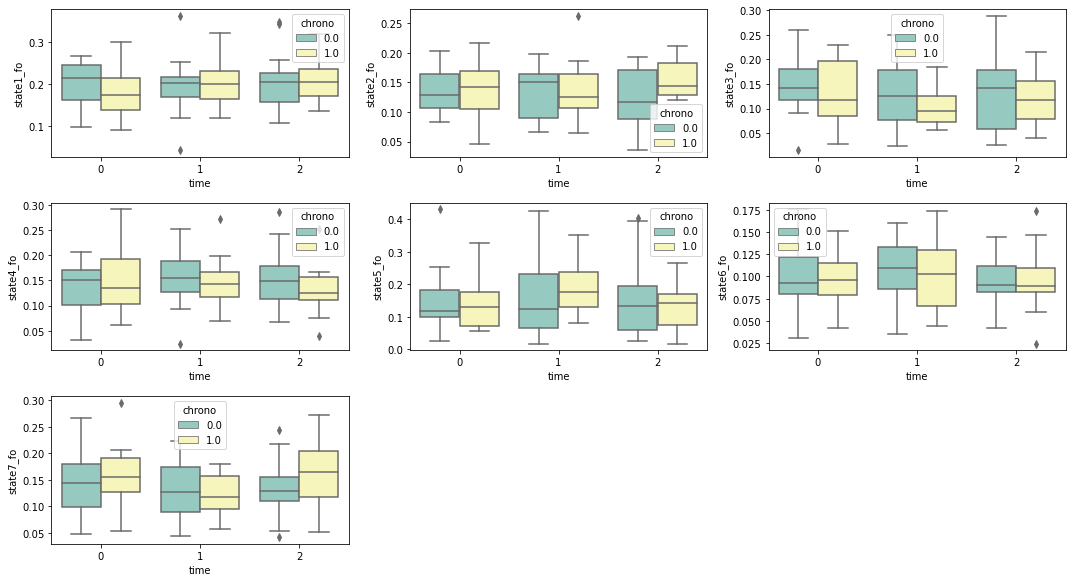

In [19]:
twoway_boxplot(fo, K_state)

In [20]:
fo.columns

Index(['state1_fo', 'state2_fo', 'state3_fo', 'state4_fo', 'state5_fo',
       'state6_fo', 'state7_fo', 'chrono', 'time'],
      dtype='object')

## Chronotype

In [21]:
ECP = fo[fo['chrono']==1]; LCP = fo[fo['chrono']==0] 

In [22]:
def shift_plot(df1,df2,K_state, feature='fo'):
    for state in range(1,K_state+1):
        feature = f'state{state}_fo'
        fig = pg.plot_shift(df1[feature], df2[feature])
        plt.show()

        
        

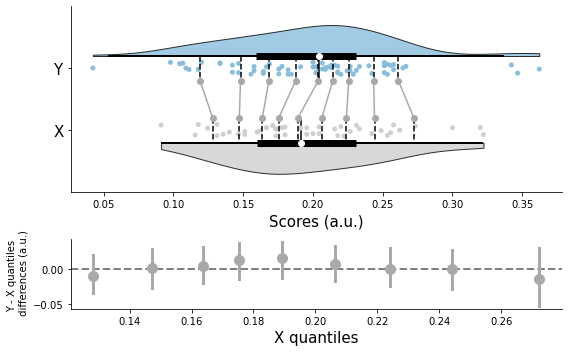

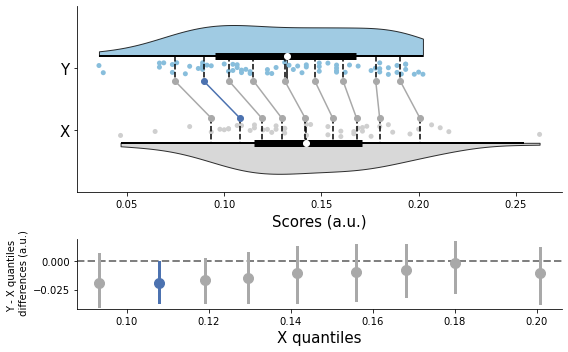

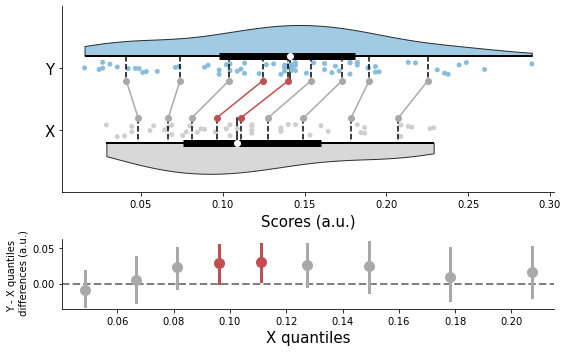

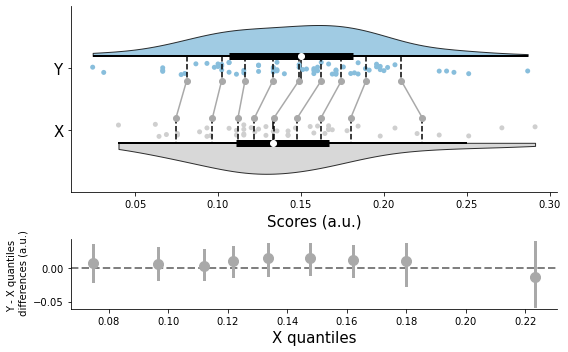

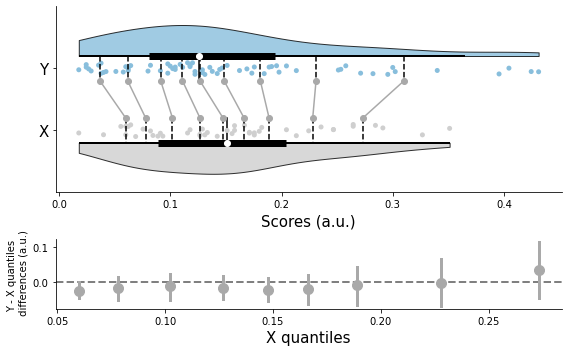

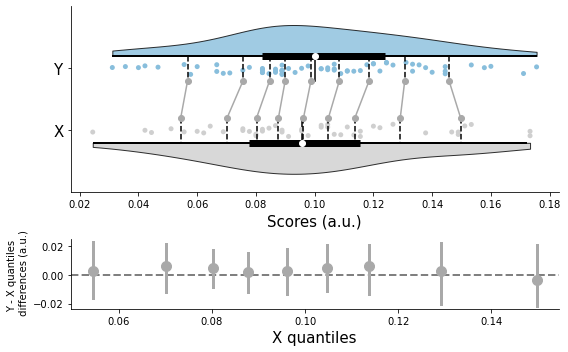

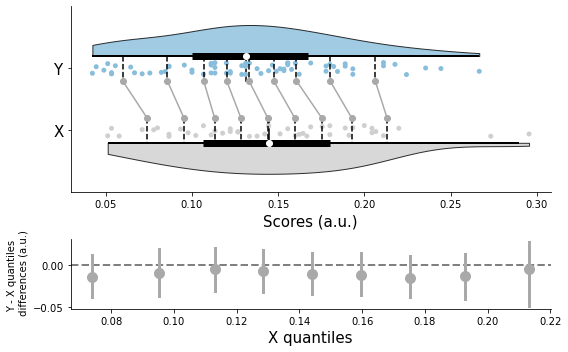

In [23]:
shift_plot(ECP,LCP,K_state)

In [24]:
compare_mean(ECP,LCP, K_state)

,normality,equal variance,stat,p value
State 1,True,True,-0.222305,0.824493
State 2,False,True,1716.500000,0.165200
State 3,True,True,-1.454550,0.148667
State 4,True,True,-0.544053,0.587516
State 5,False,True,1612.500000,0.445546
State 6,True,True,-0.368094,0.713517
State 7,True,True,1.080428,0.282337


In [25]:
fo

,state1_fo,state2_fo,state3_fo,state4_fo,state5_fo,state6_fo,state7_fo,chrono,time
0,0.115556,0.106667,0.117778,0.220000,0.171111,0.075556,0.193333,1.0,0
1,0.146667,0.153333,0.117778,0.177778,0.126667,0.151111,0.126667,1.0,0
2,0.273333,0.206667,0.208889,0.062222,0.060000,0.062222,0.126667,1.0,0
3,0.160000,0.166667,0.140000,0.111111,0.182222,0.080000,0.160000,1.0,0
4,0.191111,0.046667,0.208889,0.206667,0.133333,0.102222,0.111111,1.0,0
...,...,...,...,...,...,...,...,...,...
106,0.257778,0.193333,0.182222,0.133333,0.024444,0.088889,0.120000,0.0,2
107,0.206667,0.111111,0.244444,0.140000,0.037778,0.042222,0.217778,0.0,2
108,0.155556,0.088889,0.151111,0.195556,0.188889,0.097778,0.122222,0.0,2
109,0.217778,0.086667,0.142222,0.171111,0.104444,0.126667,0.151111,0.0,2


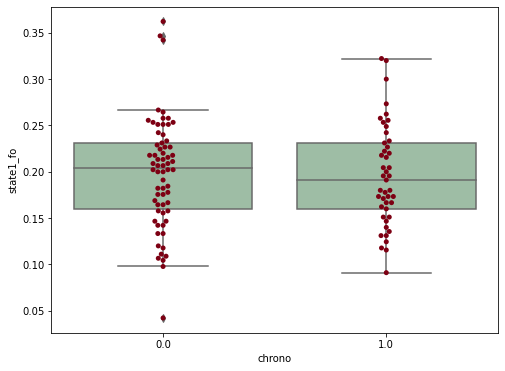

In [26]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='chrono', y='state1_fo', data=fo, color='#99c2a2')
ax = sns.swarmplot(x='chrono', y='state1_fo', data=fo, color='#7d0013')

plt.show()

## Time of the day

In [27]:
#@title warp oneway_anova
def oneway_anova(fo,K_state):
    li = []
    state_list = [ f'state{i}_fo' for i in range(1, K_state+1)]
    for state in state_list:
        m=fo[fo['time']==0][state]
        a=fo[fo['time']==1][state]
        e=fo[fo['time']==2][state]
        li.append(stats.f_oneway(m,a,e))
    return pd.DataFrame(li, index=state_list, columns=['F value', 'p value'])

In [28]:
oneway_anova(fo, K_state)

,F value,p value
state1_fo,0.420322,0.657905
state2_fo,0.018157,0.982010
state3_fo,1.392774,0.252810
state4_fo,0.287875,0.750429
state5_fo,0.868518,0.422482
state6_fo,0.953305,0.388684
state7_fo,1.505287,0.226573


In [29]:
M = ECP = fo[fo['time']==0]; A = fo[fo['time']==1]; E = fo[fo['time']==2] 

In [30]:
compare_mean(M,A, K_state)

,normality,equal variance,stat,p value
State 1,True,True,-0.353034,0.725094
State 2,True,True,0.154883,0.877347
State 3,True,True,1.791400,0.077431
State 4,True,True,-0.707484,0.481550
State 5,False,True,558.500000,0.174811
State 6,True,True,-0.593759,0.554535
State 7,True,True,1.678464,0.097592


In [31]:
compare_mean(A, E, K_state)

,normality,equal variance,stat,p value
State 1,True,True,-0.552666,0.582204
State 2,True,True,-0.168237,0.866869
State 3,True,True,-0.910700,0.365493
State 4,True,True,0.619634,0.537455
State 5,False,True,781.000000,0.299274
State 6,True,True,1.420034,0.159914
State 7,True,True,-1.379693,0.171951


In [32]:
compare_mean(M,E, K_state)

,normality,equal variance,stat,p value
State 1,True,True,-0.912745,0.364423
State 2,True,True,-0.024033,0.980893
State 3,True,True,0.702381,0.484706
State 4,True,True,-0.084359,0.933005
State 5,False,True,691.500000,0.943972
State 6,True,True,0.773126,0.441978
State 7,True,True,0.306824,0.759863


In [33]:
get_number_of_visit(lifetime)

,state1_visits,state2_visits,state3_visits,state4_visits,state5_visits,state6_visits,state7_visits
0,10,11,10,15,17,7,15
1,12,14,11,14,11,12,11
2,24,17,16,7,7,7,13
3,18,14,11,10,10,6,11
4,18,5,13,15,11,8,13
...,...,...,...,...,...,...,...
106,21,13,13,11,2,11,13
107,18,10,18,9,4,4,16
108,14,9,18,12,16,9,7
109,16,8,13,13,8,10,12
